# Object Detection

## General Flow of Object Detection

        NMS (Non-Maximum Suppression) is a post-processing step in the object detection pipeline. Here's a general flow of the object detection process, highlighting where NMS comes in:

        1. **Pre-processing**: This might involve resizing the image, normalization, or other steps to prepare the image for the model.
        2. **Model Prediction**: The object detection model processes the image and produces multiple bounding box predictions with associated confidence scores.
        3. **Post-processing (NMS)**: Given the multiple bounding box predictions, NMS is applied to suppress redundant boxes, ensuring that only the most confident prediction for each object is retained.
        4. **Evaluation (if in the validation/testing phase)**: If you are in the evaluation phase (i.e., assessing the model's performance on a validation or test set), you would then compare the post-NMS bounding box predictions with the ground truth annotations using metrics like IoU. This evaluation is done to quantify how well the model is performing.

        - NMS is a post-processing step.
        - It is applied after the model makes its predictions and before evaluation (if you are evaluating). If you're just deploying the model for inference (without evaluating its performance), then you'd still apply NMS after the model's predictions to refine the output bounding boxes.

<font color=blue>Yes, in the YOLO (You Only Look Once) object detection framework, bounding boxes or anchor boxes can definitely have sizes greater than a single grid cell. 
    
Here's a brief explanation:

1. **Grid Cells**: The YOLO framework divides the image into a grid, e.g., 13x13 for YOLOv2 with a 416x416 input image. Each grid cell is responsible for predicting bounding boxes.

2. **Bounding Boxes & Anchor Boxes**: 
   - Each grid cell predicts a certain number of bounding boxes, depending on the version of YOLO. For example, YOLOv2 predicts 5 bounding boxes per grid cell.
   - These bounding boxes are parameterized relative to anchor boxes, which are predetermined shapes. The anchor boxes are designed based on the common shapes/sizes of objects in the training data. They can certainly be larger (or smaller) than a grid cell.
   - A bounding box prediction includes offsets and scale factors that adjust the position and size of the corresponding anchor box.

3. **Bounding Box Size**: 
   - The width and height of a predicted bounding box can be larger than the size of a grid cell. In fact, it's quite common for objects that span multiple grid cells to have bounding boxes larger than a single cell.
   - The center of a bounding box, however, is always located within the grid cell that predicts it. If an object's center falls within a grid cell, that cell is responsible for predicting the bounding box for that object, even if the object's size spans multiple cells.

4. **Example**: Consider an image of a dog that spans several grid cells in width and height. The grid cell containing the center of the dog is responsible for predicting the bounding box for the dog. The predicted bounding box can be larger than the grid cell itself and might span multiple grid cells to encompass the entire dog.

So, in summary, while the center of a bounding box must lie within its responsible grid cell, the width and height of the bounding box can extend beyond the limits of the grid cell. This allows YOLO to detect objects of various sizes spread across the image.

*In Image classification there is an image & we classify that image however in real life there is a scene & there r many objects/images in that scene, & we need to recognise them hence object detection.*

## Evolution of object detection 
        
        For most of technologies CNN is the fundamental thing.
        
        
        - 1. Sliding Window Object Detection
        - 2. Semantic Segmentation

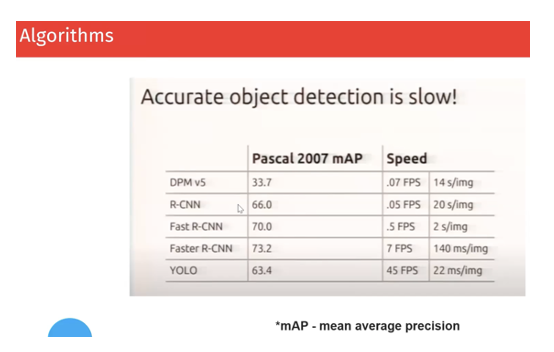

mAP (mean Average Precision) - the higher the better. mAP (like accuracy) is parameter based on which object detection algorithms r measured.

## 1. Sliding Window Object detection

Breakdown this image into smaller parts & then run classification on different-2 parts of image. This was sliding window, the classification on each window was through CNN only. The only difference was instead of complete image, image was divided into sliding windows. On each window it was checked if there was any class present. It was in a way brute force approach.

**What is a Brute Force Approach**

A "brute force" approach in computing refers to solving a problem by trying every possible solution until the correct one is found, without using any heuristics or shortcuts. The term implies that the method is straightforward, uninformed, and inefficient. Here are a few key points about the brute force approach:

1. **Simplicity**: Brute force is often the simplest method to implement because it doesn't require any clever techniques or insights about the problem.
  
2. **Inefficiency**: While it's simple, brute force is often the least efficient solution, especially for large input sizes. It can take an impractically long time to run in many cases.
  
3. **Guaranteed Solution**: Despite its inefficiency, brute force guarantees a solution (if one exists) because it checks every possibility.
  
4. **Benchmarking**: Brute force solutions can serve as a baseline when testing more sophisticated algorithms. If a more advanced method produces a different result than the brute force method, it might indicate a mistake in the advanced method.

5. **Use Cases**: While often inefficient, there are scenarios where the problem space is small enough that brute force is acceptable or even optimal.

e.g. 
Consider the problem of finding the password for a lock that accepts a 4-digit code. A brute force approach would involve trying every combination from 0000 to 9999 until the correct one is found.

For many problems, especially those with exponential growth in possibilities (like the Traveling Salesman Problem), brute force becomes impractical very quickly. As a result, researchers look for more efficient algorithms or heuristics to solve such problems in a reasonable amount of time.

## 2. Semantic Segmentation

Trying to identify regions of interest within the image in 1 go. Thats where technique of semantic segmentation comes in.

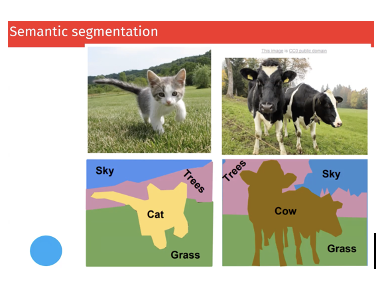

U try to segment/divide image without understanding actually what the object is. U just try to segment based on pixel values and color etc. U still need to train system but u can train system to segment based on pixels e.g. in drastic change in pixel values b/w sky and trees. Semantic Segmentation is basis on which R-CNN family of algorithms came up. 

## 3. R-CNN Family - Two stage detectors

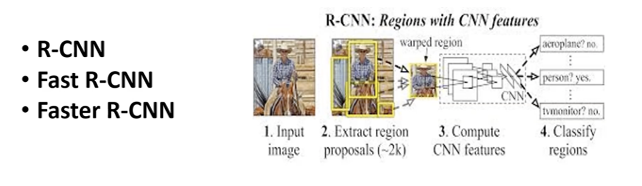

The underlying technique-CNN remains same but added certain features for each of these & then speed has been increased.

## 4. Yolo object detection algorithm - Single Shot Detector

*<font color=blue>SSD (Single Shot MultiBox Detector) and YOLO (You Only Look Once) are not the same, but they share some similarities in their approach to object detection. Both are "single-shot" detectors, meaning they aim to detect objects in one forward pass of the network without the need for a separate region proposal step. This makes both methods relatively fast compared to two-stage detectors like R-CNN, Fast R-CNN, and Faster R-CNN.*

<font color=blue>In Yolo, there r 2 models at work - one is classification model & other is regression model.

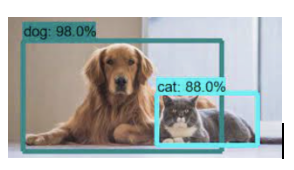

### **How do you obtain the score marked along with class label e.g. 98%, 88%?**

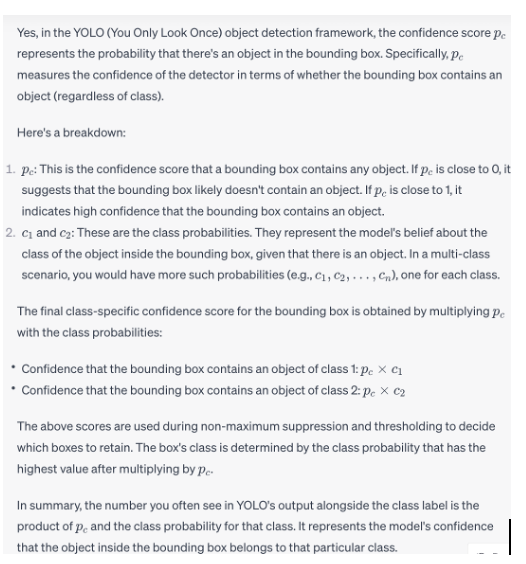

### Inference & Training

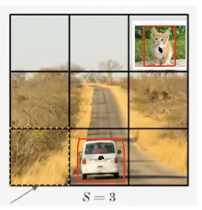

We have taken a $3*3$ grid for easier understanding however in actual it may be $19*19$ or $17*17$.

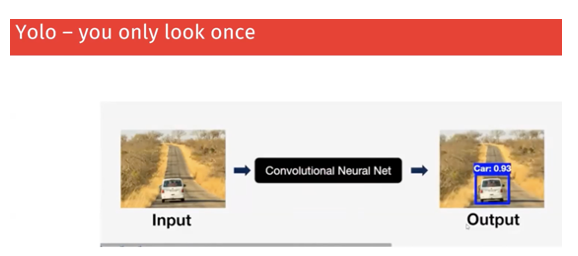

This whole thing happens in 1 shot hence like Single Shot Detection (SSD) unlike sliding window detection where 9 grids would have been passed through n/w individually & hence 9 times processing while in Yolo also divided into 9 grids but detection happens only in 1 pass for all 9 grids.

*So, while both the grid in YOLO and the filters in CNNs are conceptual tools to help us understand and visualize the operations, they directly correspond to actual mathematical operations and structures within the network. To summarize, while the dot product operation is fundamental to the convolutional layers in both CNNs and YOLO's feature extraction stage, the grid-based predictions in YOLO involve a combination of linear transformations and activations. The grid division concept in YOLO mainly dictates how these predictions are organized spatially, rather than representing a specific mathematical operation like the dot product in CNNs.*











### Output 

For image o/p is kind of a tensor as shown below. e.g. a  $3 * 3$ image, for every grid cell there are 7 values. For each image in a compact way u need to store values, the best way is to store as a tensor. If u have 100 images it can be $100 * 3 * 3 * 7$.Tensors can be multi-dimensional.

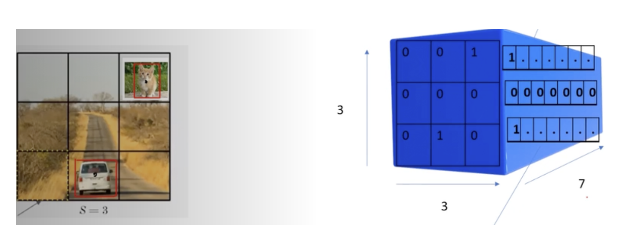

## Yolo object detection algorithm - Single Shot Detector - Labelling and Training

When u r creating training data, ur labelling should give all 8 value array for training the model so u need to measure the coordinates of center of cat, height, width, & in classes c1,c2,c3, give 1 for cat rest 0.

Before training u need to provide this labelling information. e.g. as given below.


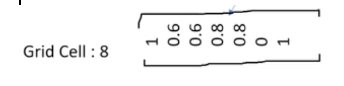

When we do inference we will get 8 values as o/p since this is how we gave the training to model.

In real scenario we cannnot use $3 * 3$ grid cell, it is too large so u will not get good accuracy.

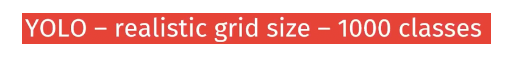

If we have a grid of $19 * 19$ & there r 1000 output classes, the output tensor will be $19 * 19 * 1005$ (1000 classes + 4 for bounding box + 1 for confidence score of object present or not. This is labelling for 1 image, if there r 10000 images it will be $10000 * 19 * 19 * 1005$.

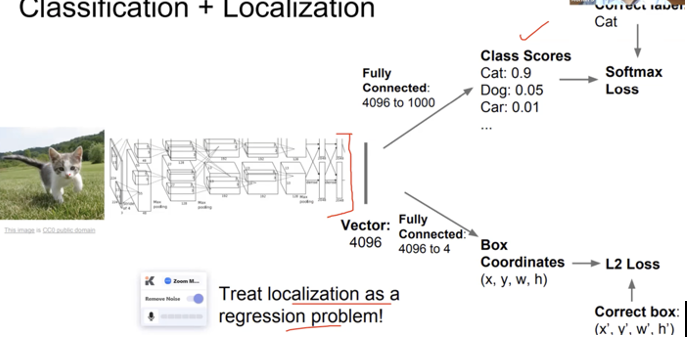

In Classification model you have CNN and in the end you have softmax classification output layer for Class scores & hence label. 

In Localization/Regression model maybe u end with linear or ReLu activation functions for predicting box coordinates. It is regression problem cz it has to provide with some continuous values.

Initially while training, the model may predict center is as marked below however with that minimization of loss where it has actual dimensions of box to compare with it will gradually be able to come exact or v.near to actual box.

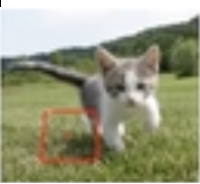

*<font color=blue>Note*

*<b>In the YOLO (You Only Look Once) object detection framework, both classification and bounding box regression occur simultaneously.</b>* YOLO divides the image into a grid (e.g., 13x13 for YOLOv3 with a 416x416 input image). For each cell in this grid, multiple bounding box predictions are made. Each bounding box prediction consists of:

1. Bounding box coordinates (regression): These are the (x, y) coordinates of the center of the bounding box, as well as its width and height. These coordinates are often predicted relative to the size of the grid cell and are then scaled up to the size of the input image.
2. Confidence score: This score represents the probability that the bounding box contains an object.
3. Class probabilities (classification): These are the probabilities of the object in the bounding box belonging to each class.

So, the network doesn't strictly perform classification before regression or vice versa. Instead, it predicts both the bounding box coordinates and class probabilities for each bounding box in every grid cell, all at once.

However, during post-processing, there's often a thresholding step applied to the confidence scores to filter out weak detections. Only after this are the class probabilities considered to assign a specific class label to each detected bounding box.

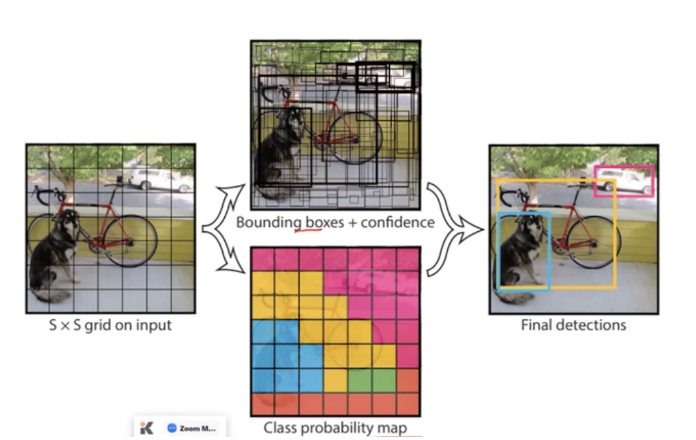

- As seen on above picture one is classification model o/p and other is regression o/p for bounding box.

- Below one predicts class probabilities for each grid cell, i.e. which class the grid cell might belong to. Kind of heatmap is shown.

- Other above one is bounding box which is regression problem.


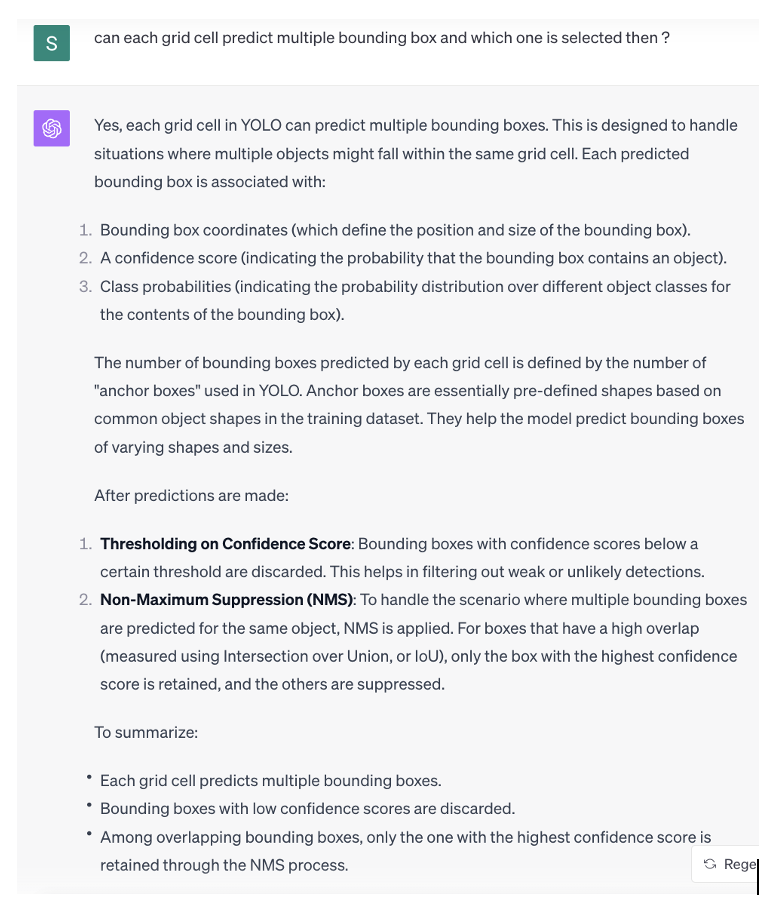

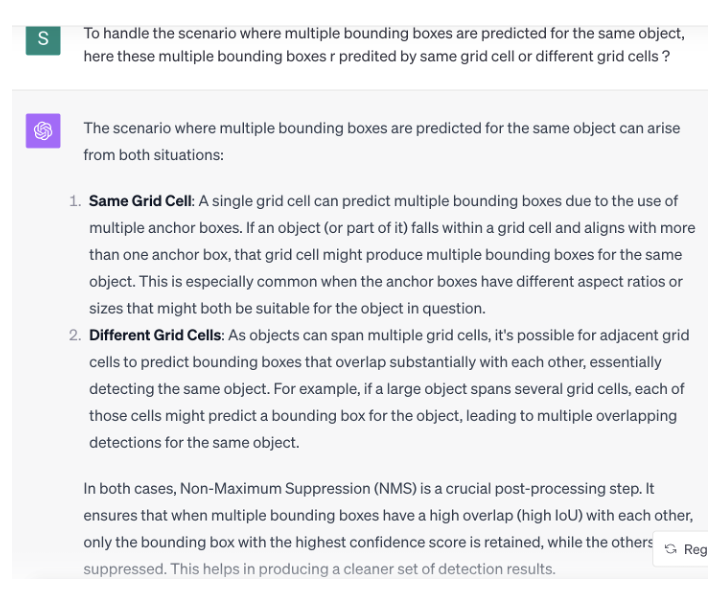

## Yolo Model Training

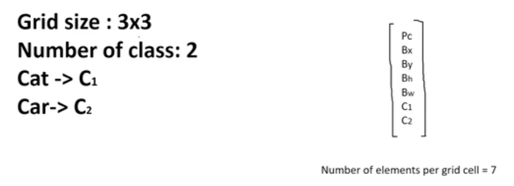

Here pc,bx,by,bh,bw,c1,c2 are all parameters as with any other neural n/w which are trained during training.

Yes, if we use the broader definition of hyperparameters as values that are set prior to training and are not learned during training, then the grid size can be considered a hyperparameter. In this context, it's a design choice made when defining the architecture, similar to choosing the number of layers in a neural network or the size of the kernel in a convolutional layer.

However, it's worth noting that in many discussions about neural networks, the term "hyperparameter" is often reserved for values that we might tune during model development to improve validation performance (like learning rate, batch size, regularization strength, etc.). Given this, some might argue that since the grid size is a fixed aspect of the YOLO architecture and not something typically adjusted in the same way we might tune other hyperparameters, it's somewhat different.

That said, for clarity in discussions, referring to the grid size as an "architectural hyperparameter" or "design choice" can help differentiate it from hyperparameters that are more commonly tuned during model development.

## Yolo - Data Labelling

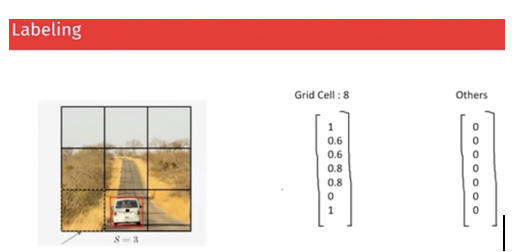

**Data Labelling in classification vs labelling in object detection**

In classification we put images of 1 class in 1 folder & images of 2nd class in another folder. However for labelling of object detection is below-

Annotation Format:

Each image is accompanied by a corresponding annotation file (usually with a .txt extension).
Each line in the annotation file represents a labeled object in the image.
A line has the format: <class_id> <x_center> <y_center> <width> <height>
class_id: An integer representing the class of the object.
x_center, y_center: The normalized x and y coordinates of the center of the bounding box. These values are normalized by the width and height of the image, respectively, so they are between 0 and 1.
width, height: The normalized width and height of the bounding box, again with values between 0 and 1.

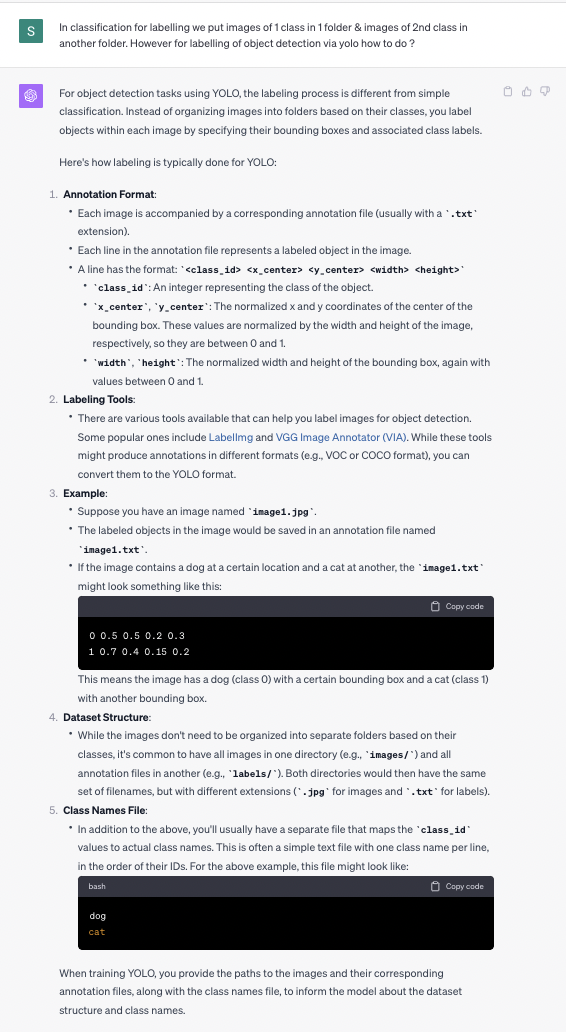

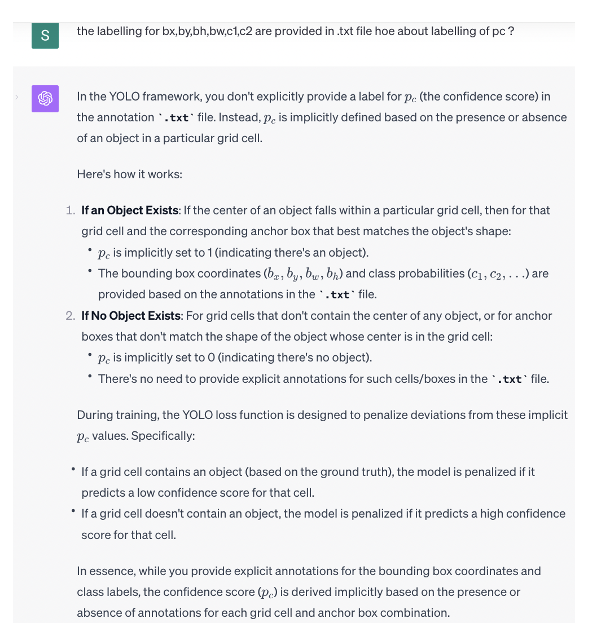

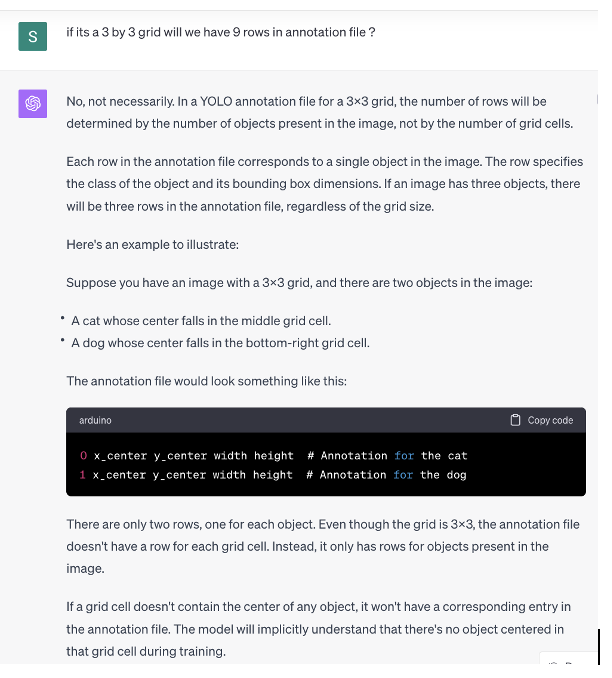

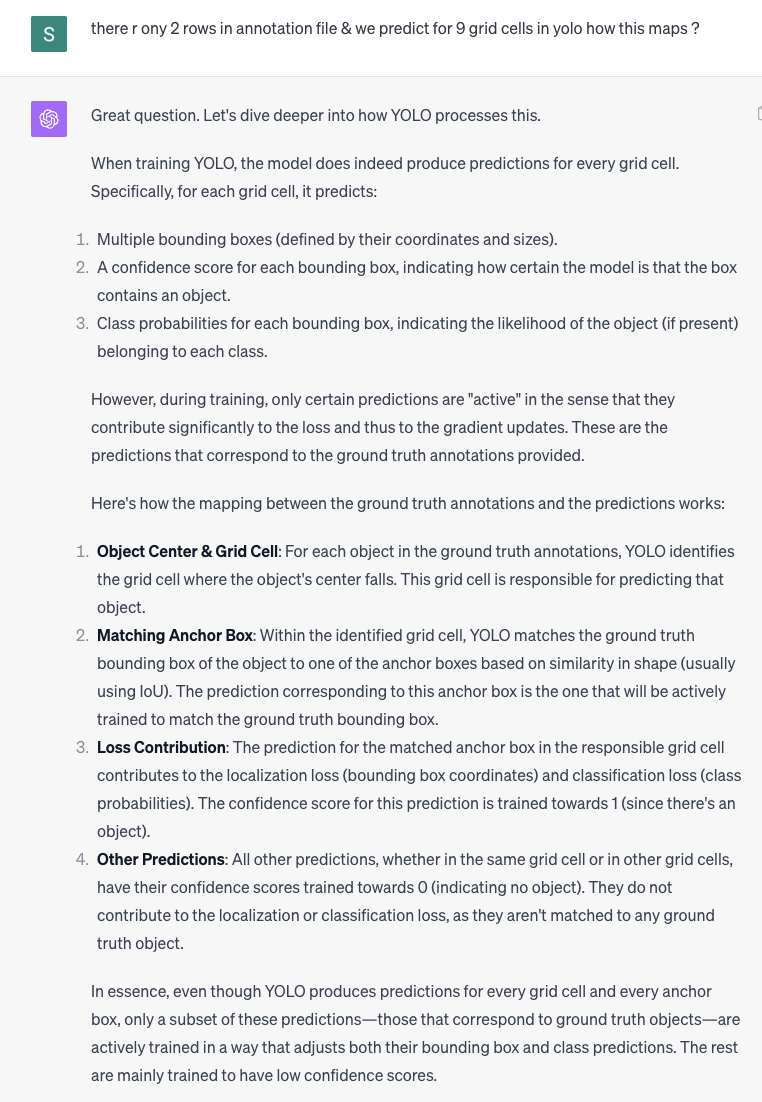

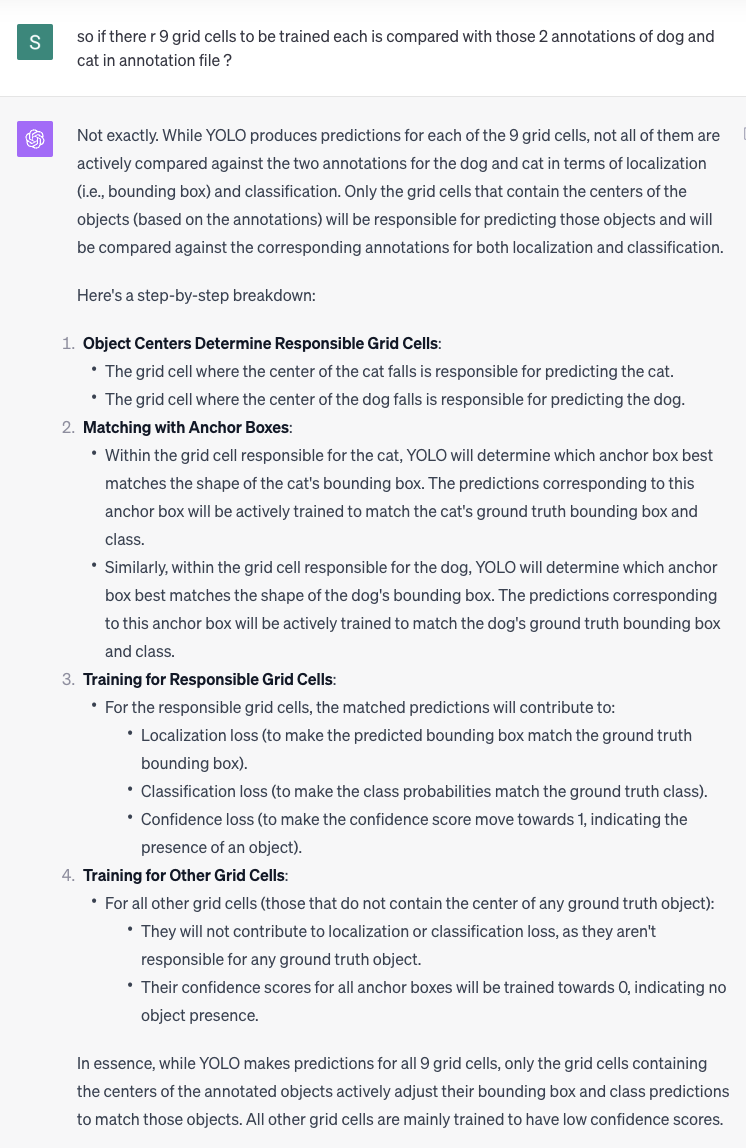

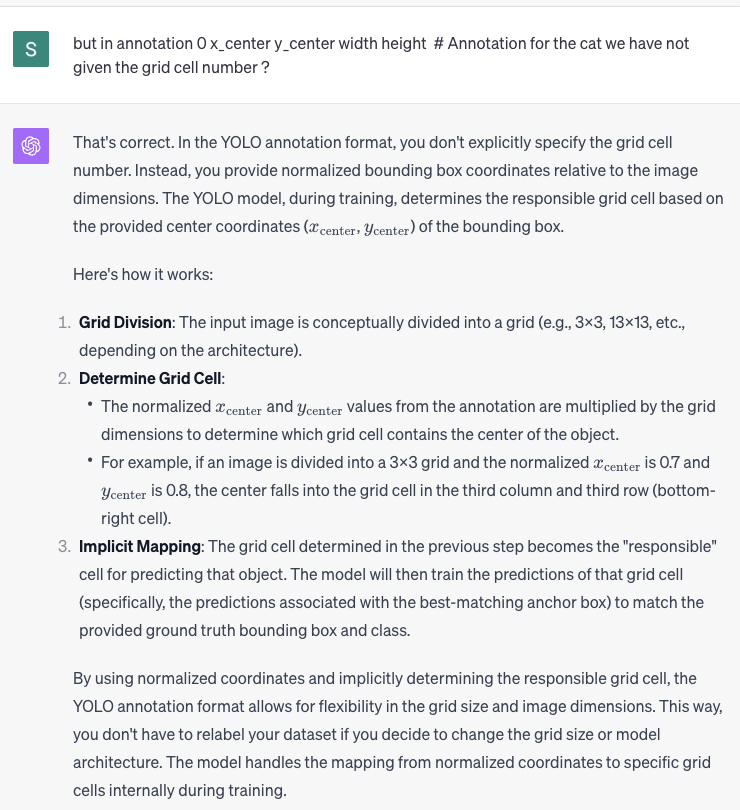

*<font color=blue>In Data Science industry labelling is still by & large a manual process*

This object detection model will only be able to identify the objects it is trained on. If it is trained on car and cat, it will not be able to identify a dog. The inference is based exactly on how u r training ur model. In real life we train on day to day 1000 common different objects so it might look like system knows everything however it will be able to answer only from those 1000 objects/classes it is trained on.

*<font color=blue> Just for understanding purpose for inference & training we r explaining via same images but in real life it is not so. IN real life the system is just trained to recognise the patterns which is like when there is an object then u find center & then draw bounding box, all that it is trained generically, it doesn;t remember like for a cat i should do this, for a dog i should do this, not really.*
    
*It classifies a new test data image as cat cz of pattern recognition not because it memorises all cat images*

## Yolo - Training

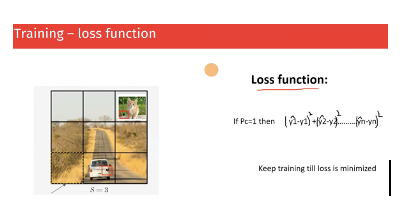

pc=1 i.e. it is minimizing loss functions in cases where object of interest is found, rest it ignores.

### Non Max supression - Localized to regions in image where the boxes overlap

To select 1 box out of multiple bounding boxes.

Non-Maximum Suppression (NMS) is a technique used in object detection to ensure that the detection process only returns one bounding box per object, even if the model predicts multiple overlapping boxes for that object. Here's why and how it works:

**Problem Without NMS**:
In object detection tasks, models like Faster R-CNN, YOLO, and SSD predict multiple bounding boxes around objects of interest in an image. Due to the nature of these models and the training process, it's common for there to be multiple bounding boxes predicted for the same object, especially if they're overlapping or very close to each other. This leads to redundant detections.

**Solution With NMS**:
NMS helps in eliminating these redundant bounding box predictions. It does so by considering the boxes' overlap (usually quantified by the Intersection over Union or IoU) and their confidence scores.

**Steps of NMS**:

1. **Sort the predictions**: All predicted bounding boxes are sorted based on their confidence scores.
2. **Select the box with the highest score**: The box with the highest score is selected and all boxes that significantly overlap with it (based on a predefined IoU threshold) are suppressed.
3. **Repeat**: The process is repeated with the next highest scoring box that has not been suppressed, and so on, until all boxes have either been selected or suppressed.

**Why is it called "Non-Maximum Suppression"?**
The name "Non-Maximum Suppression" comes from the fact that it suppresses boxes that are not the maximum (i.e., they don't have the highest confidence score) within a local region defined by the overlap (IoU). If a box isn't the "maximum" in its local neighborhood, it gets suppressed.

In essence, NMS ensures that you only get the most confident bounding box for each detected object in an image.

Correct. The process of Non-Maximum Suppression (NMS) is localized to regions of the image where bounding boxes overlap, rather than being applied to the entire image. 

Here's a more detailed breakdown:

1. **Select the highest scoring box**: Among all the predicted bounding boxes, you pick the one with the highest confidence score.
2. **Identify overlapping boxes**: You then look for other boxes that overlap with this highest scoring box. The degree of overlap is typically measured using Intersection over Union (IoU).
3. **Suppress overlapping boxes based on IoU threshold**: If the IoU of a box with the highest scoring box exceeds a certain threshold (e.g., 0.5), it is considered to significantly overlap and is suppressed.
4. **Move to the next highest scoring unsuppressed box**: Among the remaining unsuppressed boxes, pick the one with the highest score and repeat the above process.

This process is localized in the sense that it primarily focuses on regions where boxes overlap. If two boxes are far apart and don't overlap, they won't affect each other during the NMS process. The goal is to ensure that, in regions where multiple boxes claim to detect an object, only the most confident prediction remains.

### Intersection Over Union is used in 2 contexts-

Intersection over Union (IoU) is used in two main contexts within the realm of object detection:

1. **Evaluation**: During the evaluation phase, IoU is used to measure the accuracy of the predicted bounding boxes against the ground truth boxes. For each predicted bounding box, you calculate the IoU with the corresponding ground truth box. If the IoU exceeds a certain threshold (e.g., 0.5), the prediction is considered a "True Positive." Otherwise, it might be considered a "False Positive."

2. **Non-Maximum Suppression (NMS)**: Within the NMS process, IoU is used to measure the overlap between predicted boxes themselves (not with the ground truth). The purpose here is to suppress redundant boxes for the same object. For the highest scoring box, you'd compute the IoU with all other boxes, and if the IoU is above a certain threshold, those overlapping boxes are suppressed.

To directly answer your question: 
- When evaluating the performance of an object detection model, IoU is calculated between predicted boxes and ground truth boxes.
- During the NMS process (which is part of the prediction/inference phase), IoU is calculated between predicted boxes themselves, not with the ground truth.

In the context of Non-Maximum Suppression (NMS), the Intersection over Union (IoU) is calculated between predicted boxes to determine how much they overlap. The box that will be finalized (i.e., kept) and which boxes will be suppressed is determined based on their confidence scores and the IoU threshold. Here's how:

1. **Sort Boxes by Confidence Score**: All predicted bounding boxes are sorted based on their confidence scores in descending order. The box with the highest confidence score is considered first.

2. **Calculate IoU**: For this highest scoring box, the IoU is calculated with all other remaining boxes.

3. **Suppression**: If the IoU of the highest scoring box with any other box exceeds a predefined threshold (e.g., 0.5), then that "other" box is suppressed, because it significantly overlaps with our highest scoring box.

4. **Repeat**: Once all overlapping boxes for the current highest scoring box have been suppressed, move to the next highest scoring box that hasn't been suppressed and repeat the process.

The "final" box, or the one that is kept, is always the one with the highest confidence score among the overlapping set of boxes. All other boxes that overlap with this box (based on the IoU threshold) are suppressed. This ensures that for any given object or region in the image, only the most confident bounding box prediction is retained.

## Error in Object Detection

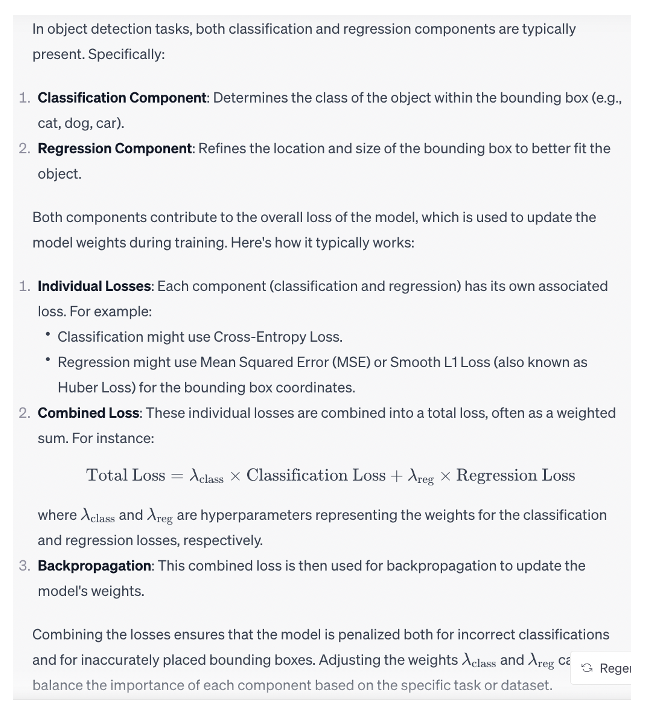


Very often u need to do object detection in real time with camera, so huge processing power required.